## Exercise 3: NDVI dynamics by biogeographical zones

This notebook supports a sample remote sensing exercise:

http://www.esa.int/SPECIALS/Eduspace_Global_EN/SEM6EJNW91H_0.html

https://proba-v-mep.esa.int/node/182

http://www.eo4geo.eu/

The main objective of this exercise is to compare vegetation for multiple years of NDVI data in five different biogeographical zones. 


In [21]:
from shapely.geometry import box
import pandas as pd
import geopandas as gpd
import openeo
%matplotlib inline

In [62]:
from shapely.geometry import box

zones = [[ 'Rainforest',box(-60,-0,-70,-10)],
 ['Tropical dry forest',box(-59,-18,-62,-20)],
 ['Temperate forest (broadleaf)',box(-72.8,-40,-73.5,-41)],
 ['Savannah', box(-68,-5,-70,-7)],
 ['Deserts', box(-65,-20,-70,-30)],
 ['Dry steppe', box(-68,-45,-70,-48)],
 ['Ice sheets',box(-73,-47,-74,-52)]
]


zones

[['Rainforest', <shapely.geometry.polygon.Polygon at 0x7f960c31ffd0>],
 ['Tropical dry forest', <shapely.geometry.polygon.Polygon at 0x7f960c31fa20>],
 ['Temperate forest (broadleaf)',
 ['Savannah', <shapely.geometry.polygon.Polygon at 0x7f960c31fc88>],
 ['Deserts', <shapely.geometry.polygon.Polygon at 0x7f963f269b00>],
 ['Dry steppe', <shapely.geometry.polygon.Polygon at 0x7f960c367588>],
 ['Ice sheets', <shapely.geometry.polygon.Polygon at 0x7f960c367d30>]]

## Showing zones on a map
It is always a good idea to check if the geographic coordinates of our zones are actually correct. An easy visual approach is to show them on a map.

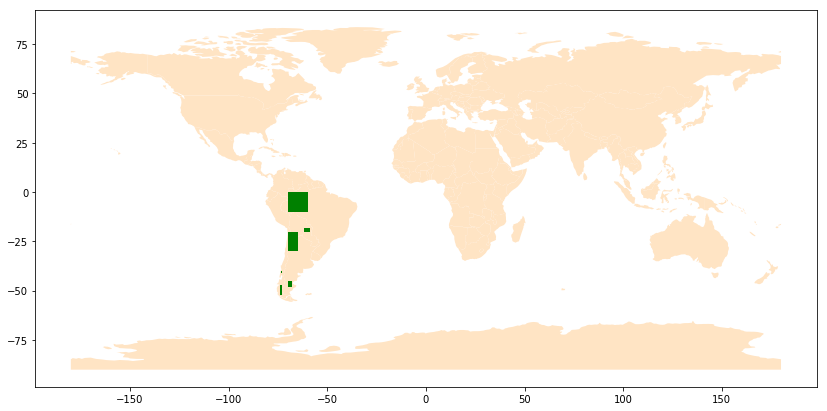

In [65]:

zones_df = gpd.GeoDataFrame(zones,crs="EPSG:4326",columns=["label","geometry"])
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
fig, ax = plt.subplots(1, 1,figsize=(14,7))
world.plot(ax=ax,color='bisque')
zones_df.plot(ax=ax,color='green')

In [66]:
zones_df

,label,geometry
0,Rainforest,"POLYGON ((-70 0, -70 -10, -60 -10, -60 0, -70 0))"
1,Tropical dry forest,"POLYGON ((-62 -18, -62 -20, -59 -20, -59 -18, ..."
2,Temperate forest (broadleaf),"POLYGON ((-73.5 -40, -73.5 -41, -72.8 -41, -72..."
3,Savannah,"POLYGON ((-70 -5, -70 -7, -68 -7, -68 -5, -70 ..."
4,Deserts,"POLYGON ((-70 -20, -70 -30, -65 -30, -65 -20, ..."
5,Dry steppe,"POLYGON ((-70 -45, -70 -48, -68 -48, -68 -45, ..."
6,Ice sheets,"POLYGON ((-74 -47, -74 -52, -73 -52, -73 -47, ..."


## Getting time series per zone

We will now retrieve the PROBA-V NDVI for each zone, and plot the resulting timeseries.
This should allow you to answer some questions.


In [67]:
session = openeo.session("nobody", "http://openeo.vgt.vito.be/openeo/0.4.0")
collection = session.imagecollection("PROBAV_L3_S10_TOC_NDVI_333M_V2")

def timeseries(zone):
    print(zone.label)
    return pd.Series(collection.polygonal_mean_timeseries(zone.geometry).execute(),name=zone.label)
%time timeseries_df = zones_df.apply(timeseries,axis=1)
timeseries_df

Rainforest
Rainforest
Tropical dry forest
Temperate forest (broadleaf)
Savannah
Deserts
Dry steppe
Ice sheets
CPU times: user 44.4 ms, sys: 11.2 ms, total: 55.6 ms
Wall time: 2min 9s


,2013-10-11T00:00:00,2013-10-21T00:00:00,2013-11-01T00:00:00,2013-11-11T00:00:00,2013-11-21T00:00:00,2013-12-01T00:00:00,2013-12-11T00:00:00,2013-12-21T00:00:00,2014-01-01T00:00:00,2014-01-11T00:00:00,...,2019-03-01T00:00:00,2019-03-11T00:00:00,2019-03-21T00:00:00,2019-04-01T00:00:00,2019-04-11T00:00:00,2019-04-21T00:00:00,2019-05-01T00:00:00,2019-05-11T00:00:00,2019-05-21T00:00:00,2019-06-01T00:00:00
0,182.333543,205.114327,179.742515,164.422972,176.422910,192.168261,182.219338,207.392543,168.210682,143.764474,...,208.593300,179.141815,189.343416,157.268363,194.190004,189.711715,206.146216,169.969364,214.273788,194.784676
1,169.696712,196.857022,221.749252,204.600170,206.069636,208.232057,209.425355,224.057456,193.076435,217.308234,...,215.554490,157.938652,216.257942,218.827799,218.240837,196.630675,205.095349,220.632944,217.330884,204.888375
2,155.885664,223.744582,230.684320,228.600149,216.107505,227.580838,221.709233,212.398328,204.678457,205.252302,...,192.315970,191.519105,184.355180,175.468604,133.436234,187.814336,150.555370,177.735170,139.800304,182.339970
3,125.197352,210.485199,150.644795,139.162521,127.070425,225.090032,159.354849,183.204573,144.349080,100.228819,...,221.406507,139.757890,188.560403,132.022884,187.548091,189.297209,222.929594,234.845130,237.596057,205.418669
4,54.061211,55.104319,57.088127,58.030827,58.097259,57.889319,60.114291,64.194662,65.676754,66.882761,...,72.357393,71.227084,68.441504,72.407296,69.937269,67.944729,65.006336,66.426356,64.450454,62.214210
5,64.229808,64.825754,66.366246,64.572871,63.423415,61.800642,62.093598,59.800640,59.237207,58.555097,...,60.710322,58.252749,57.808035,60.354738,61.224363,64.477487,64.432343,65.338792,68.145189,75.367523
6,41.761632,51.416847,59.921965,43.155224,44.446934,50.703898,64.099473,40.927059,44.482418,58.837952,...,59.667816,71.628894,66.294338,58.410855,54.444016,62.039323,54.344309,38.679612,48.953400,32.426278


In [68]:
timeseries_df.index = zones_df.label

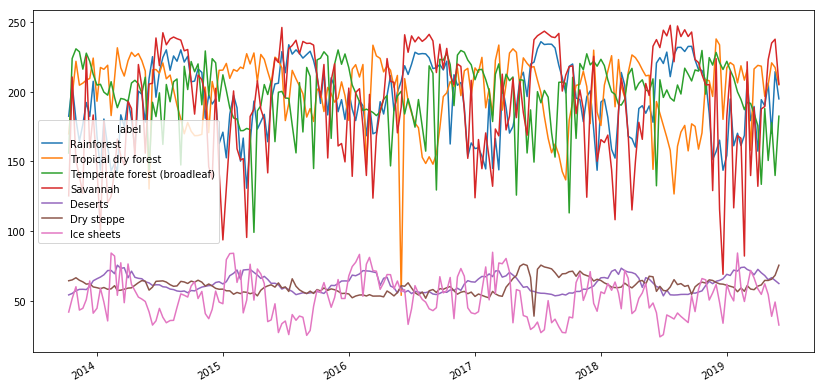

In [69]:
df = pd.DataFrame(timeseries_df.T)
df.index = pd.to_datetime(df.index)
df.plot(figsize=(14,7))

1.	Describe the variation of NDVI over the year for the selected bio-zones.

2.	Compare the results with the description of the bio-zones in the background articles. Are the results of your work as expected?

3.	Can you explain the seasonal variations? 